## Mathematical Models of Systems

1. Define the system and its components.
2. Formulate the mathematical model and fundamental necessary assumptions based on basic principles.
3. Obtain the differential equations representing the mathematical model.
4. Solve the equations for the desired output variables.
5. Examine the solutions and the assumptions.
6. If necessary, reanalyze or redesign the system.

## Differential equations of physical systems

Consider a tortional spring. 

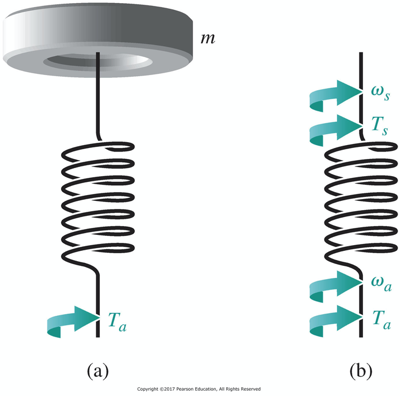

The torque at each end must be the same. So, we can consider that it travelled through the spring, and we call it a *through variable*. 

The twist at each and, $\theta$, is different across the spring. So, we call it an *across variable*.

System | Variable Through Element | Integrated Through Variable | Variable Across Element | Integrated Across Element
-------|--------------------------|-----------------------------|-------------------------|---------------------------------
Electrical | Current, $i$| Charge, $q$| Voltage difference, $v_{21}$| Flux linkage, $\lambda_{21}$
Mechanical translational| Force $F$ | Translational momentum, $P$|Velocity Difference, $v_{21}$| Displacement difference, $y_{21}$
Mechanical rotational|Torque, $T$|Angular Momentum, $h$|Angular Velocity Difference, $\omega_{21}$|Angular displacement difference $\theta_{21}$
Fluid |  Fluid volumetric rate of flow, $Q$| Volume, $V$| Pressure difference $P_{21}$| Pressure momentum $\gamma_{21}$